### Radial/azimuthal data and save profiles for peak fitting.


version 1.0.0  January 8, 2020 JS

This script consists of 3 parts: 1) reading .pkl data. 2) cropping ROI,  3) saving profiles (004, equator)

0it [00:00, ?it/s]

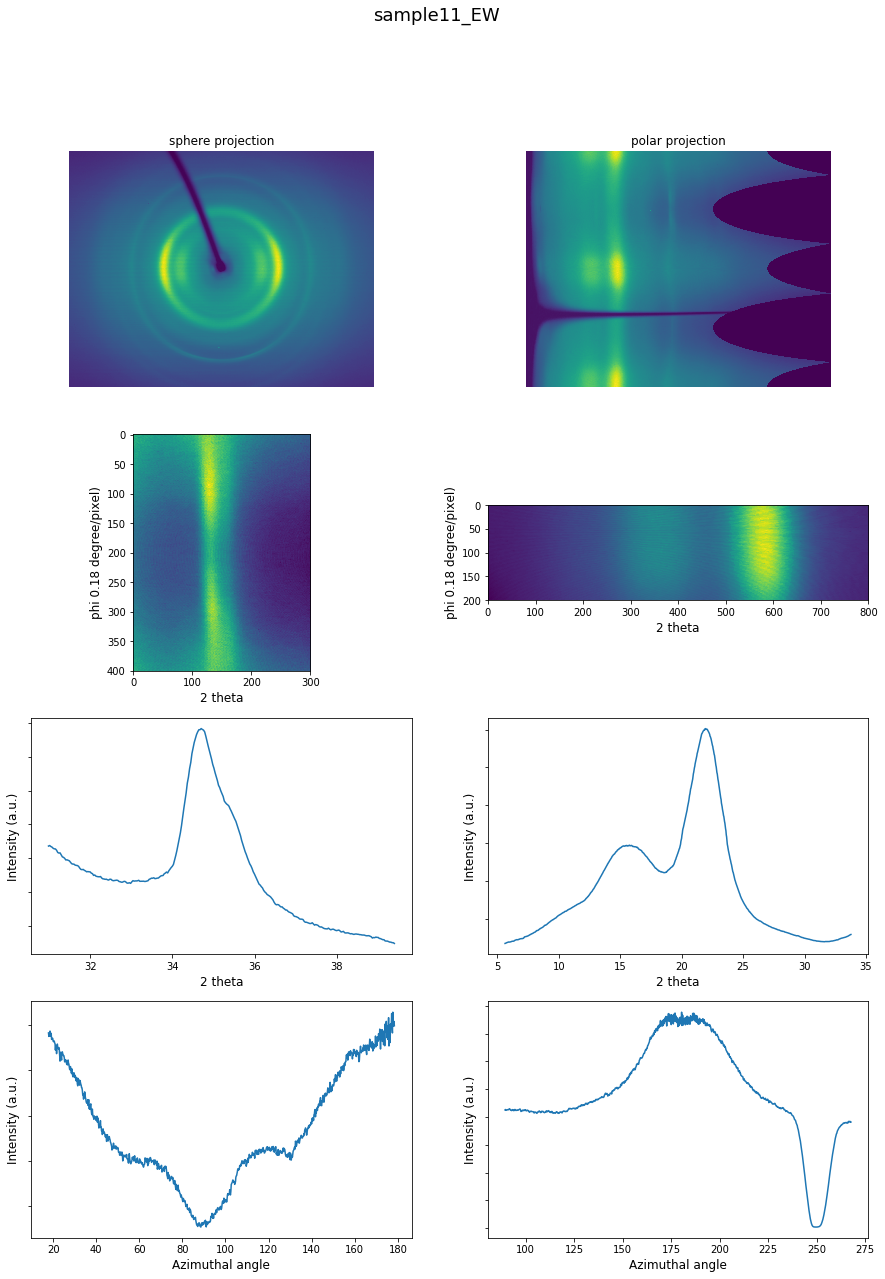

1it [00:02,  2.22s/it]

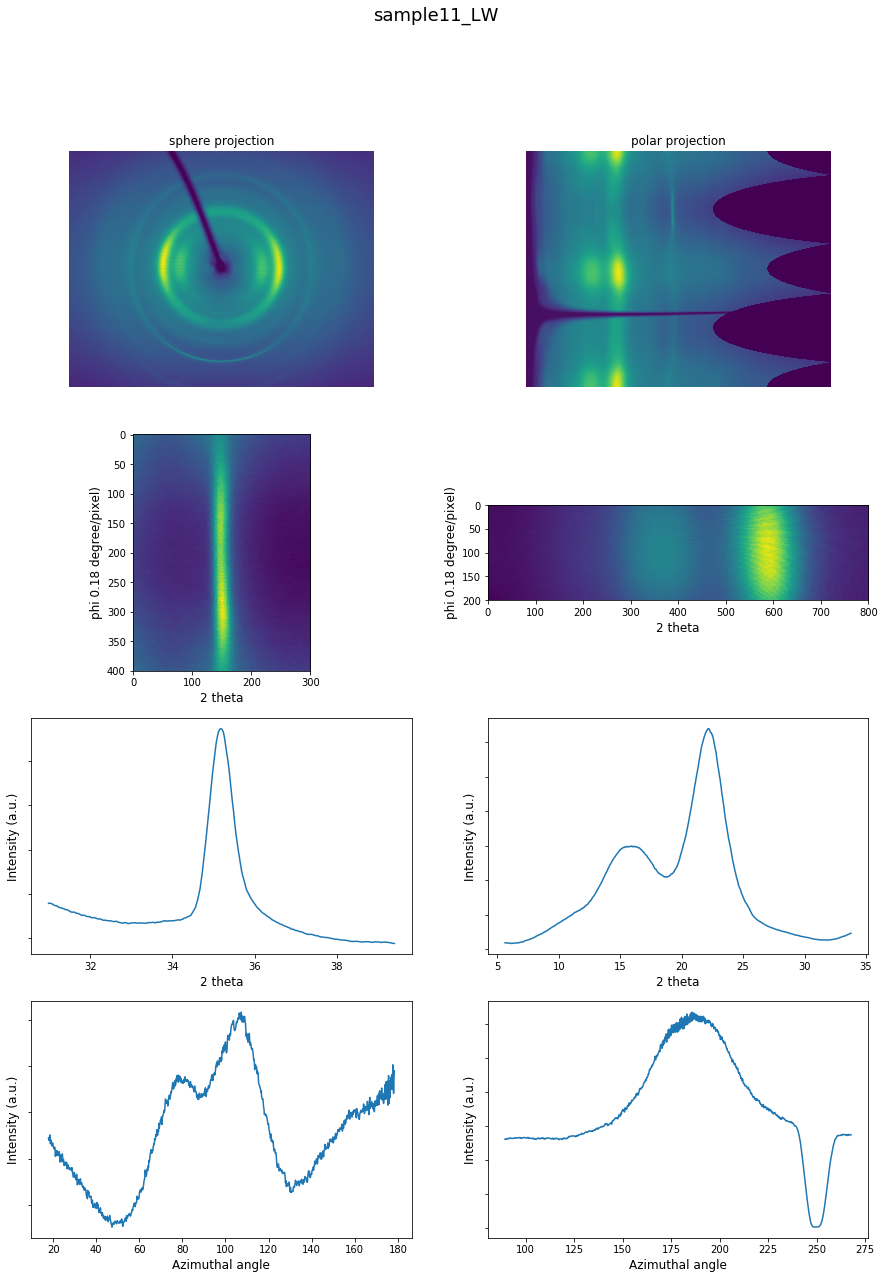

2it [00:04,  2.18s/it]

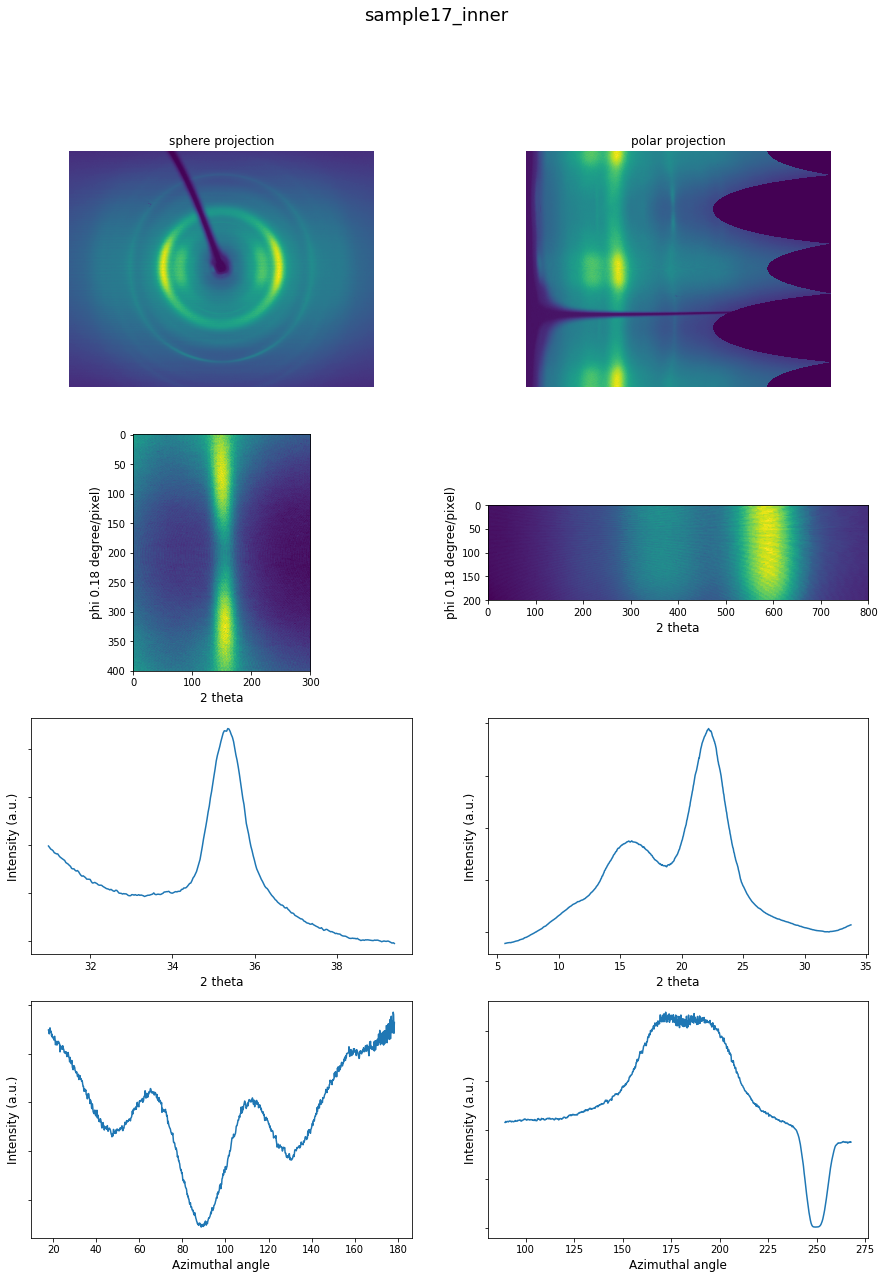

3it [00:06,  2.15s/it]

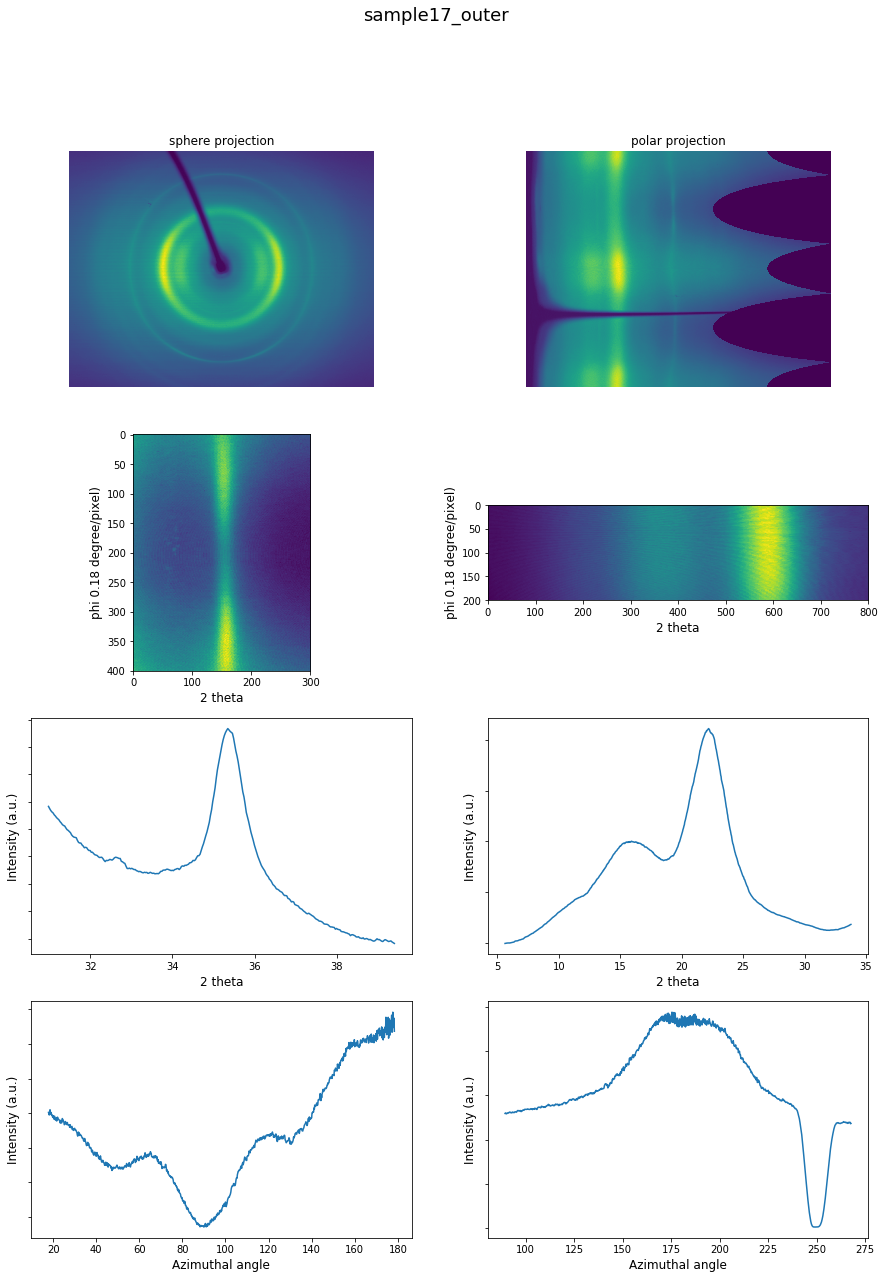

4it [00:08,  2.14s/it]

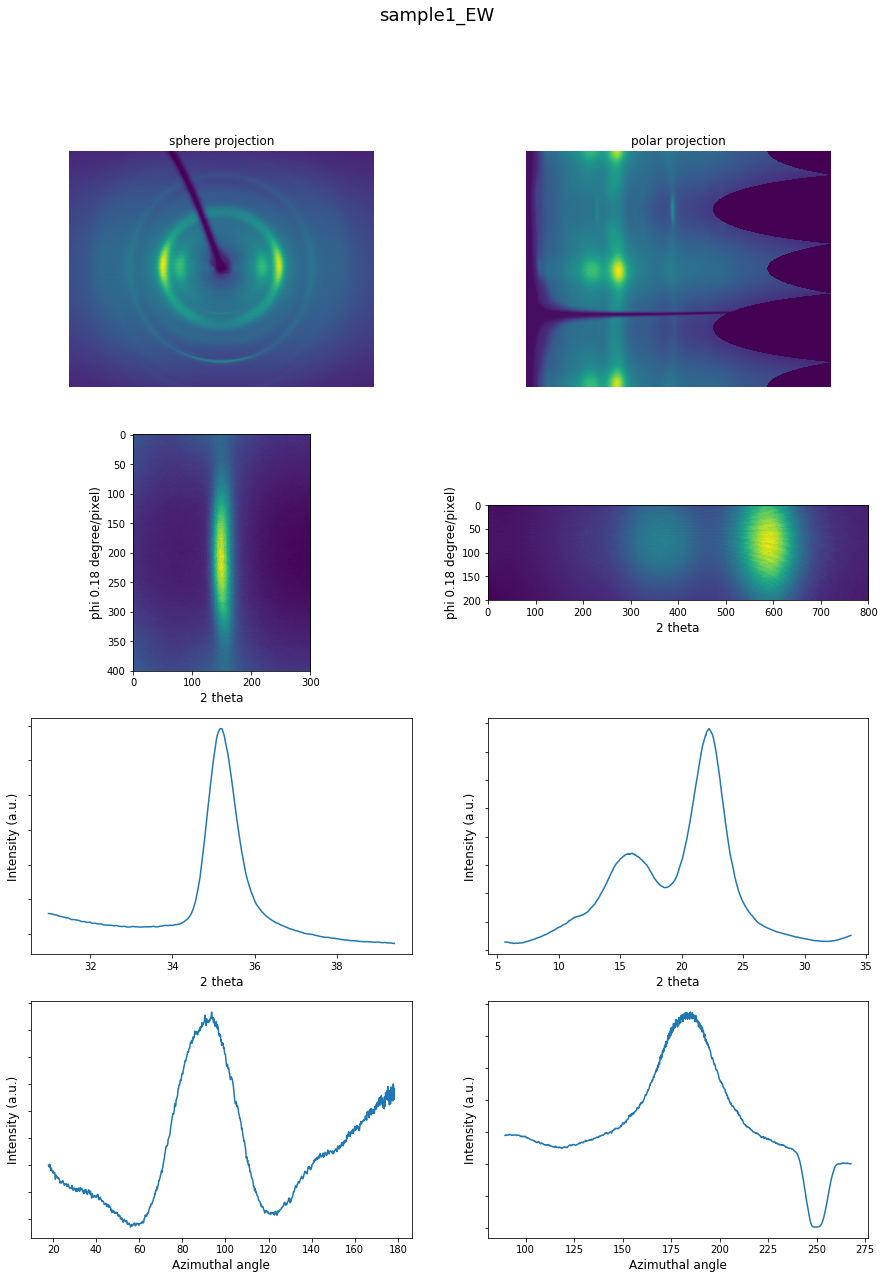

5it [00:10,  2.15s/it]

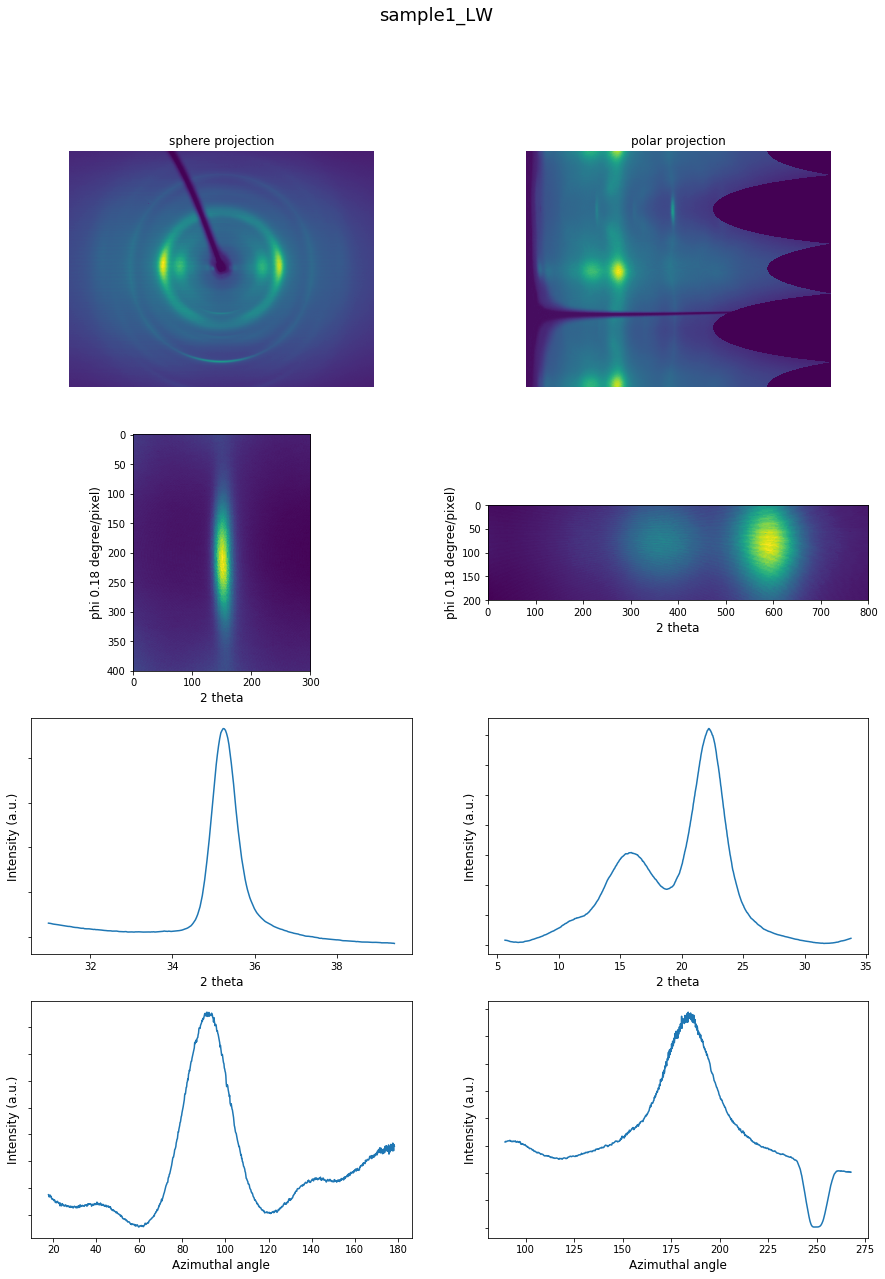

6it [00:12,  2.13s/it]

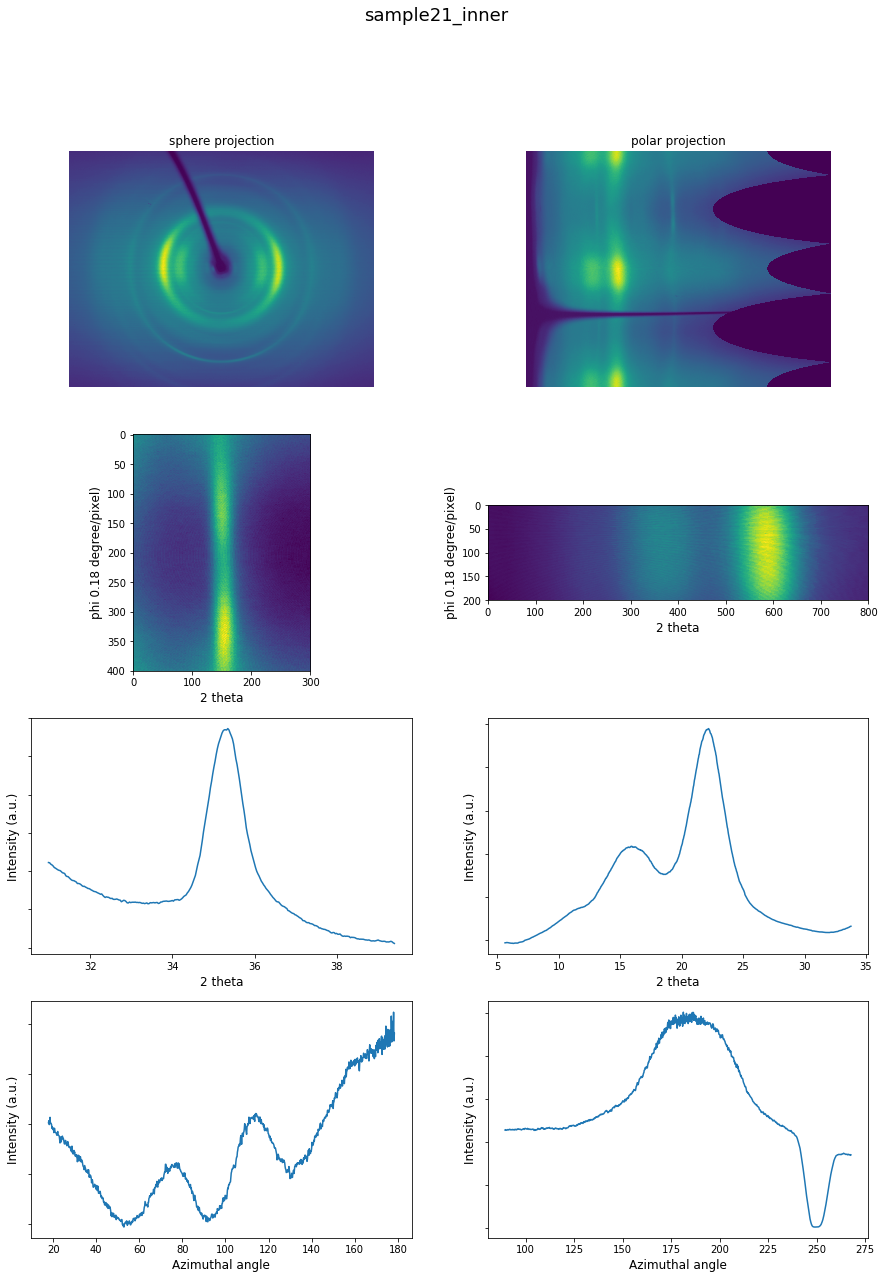

7it [00:14,  2.12s/it]

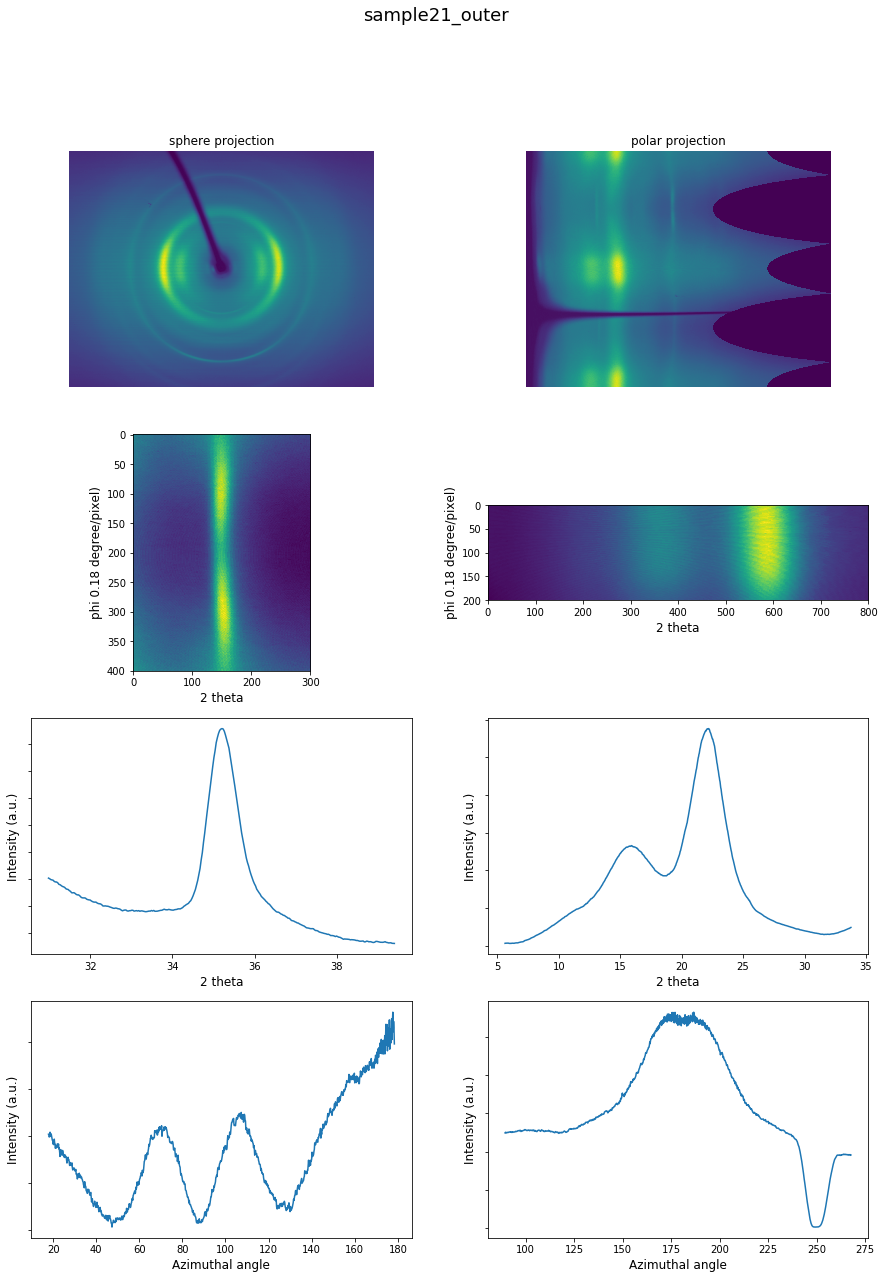

8it [00:17,  2.13s/it]

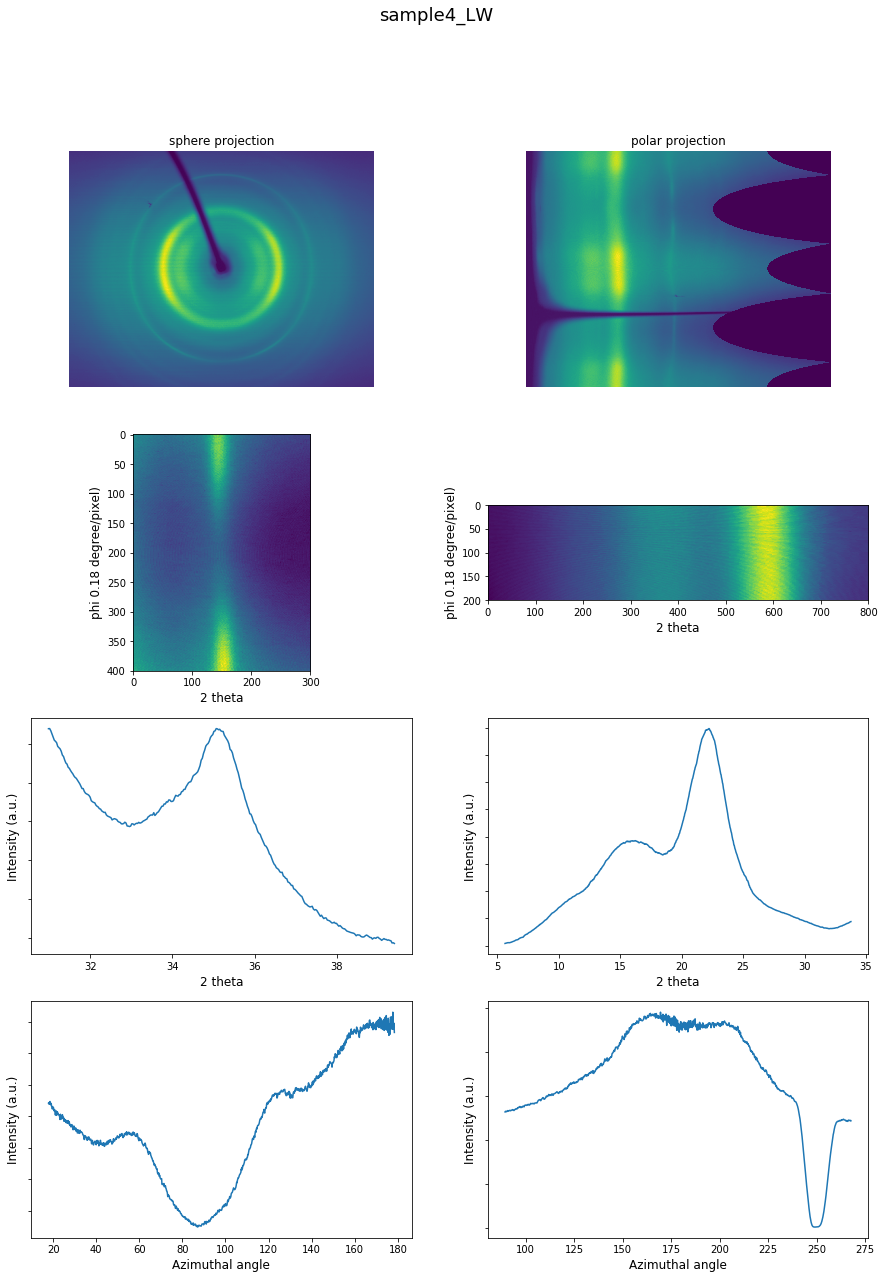

9it [00:19,  2.12s/it]

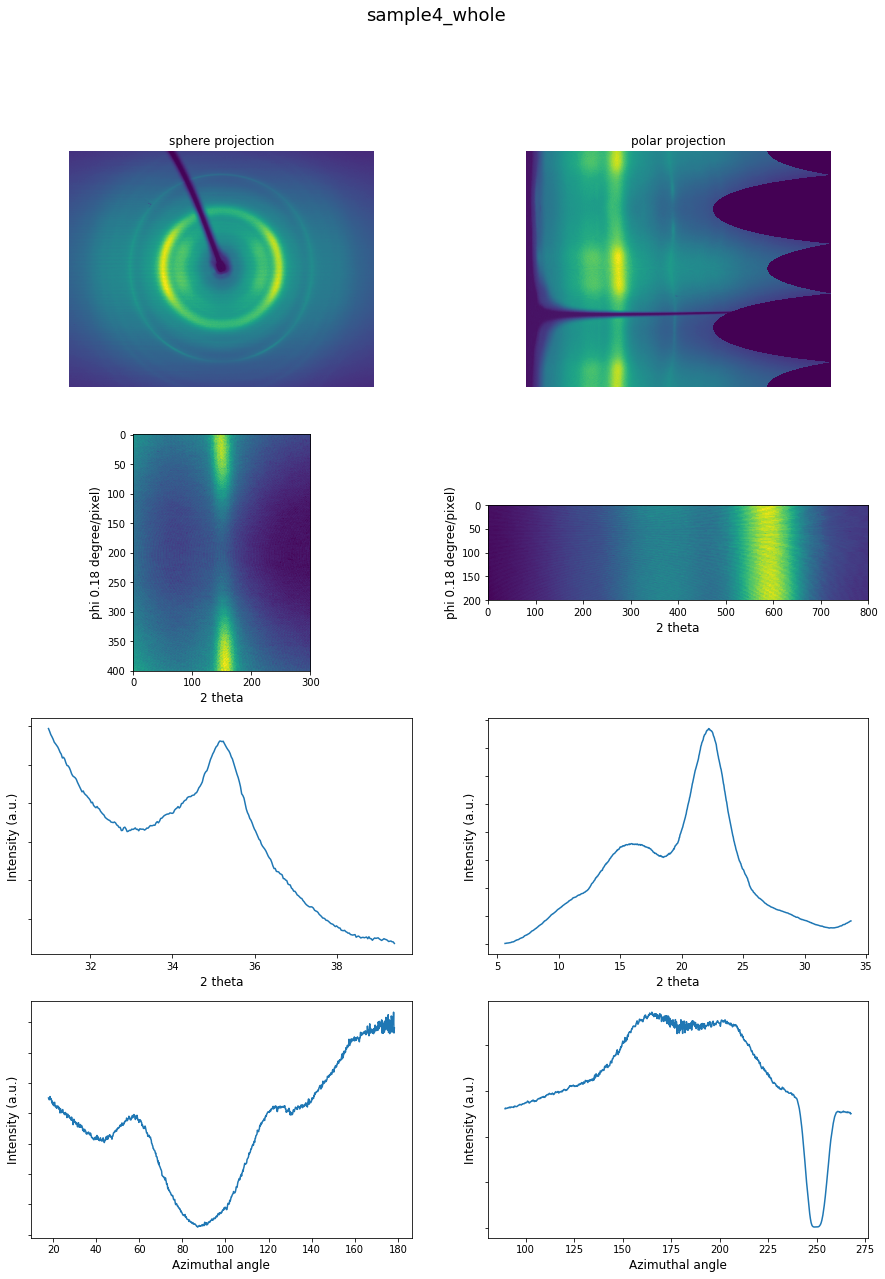

10it [00:21,  2.11s/it]

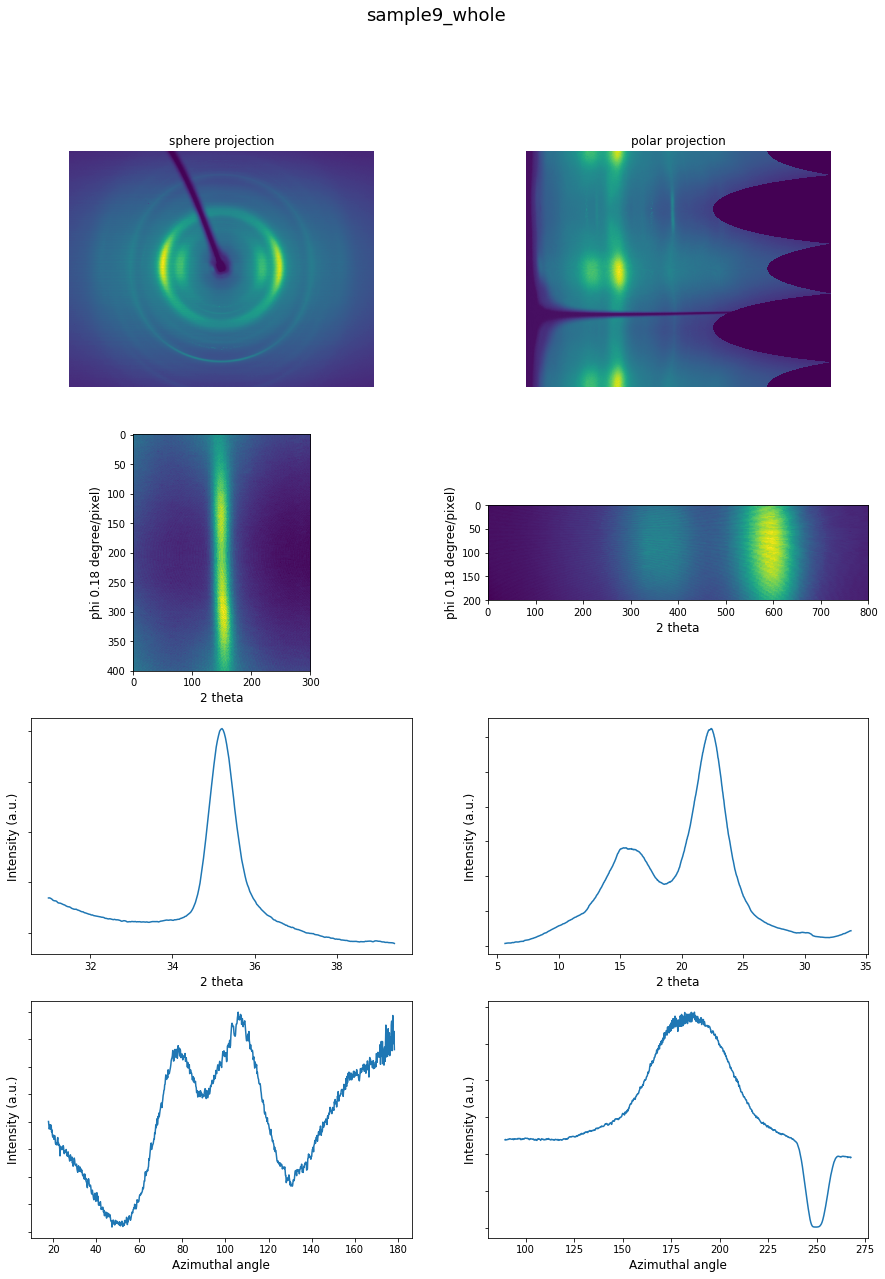

11it [00:23,  2.13s/it]


In [1]:
### XRAY_28_DES_2020
### vertical axis is converted to 2-theta axis by bilinear interpolation.
### then coverted to polar coordinate and save data as pandas table.

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import math
import os
import cv2
from tqdm import tqdm
import pandas as pd
from common.xray import *
%matplotlib inline


in_path='./data'
polar_path='./results/polar'
sphere_path='./results/sphere'
figure_path='./results/figure'
profile_path='./results/profile'
profile_cave_path='./results/profile_cave'
polar_names=sorted([filename for filename in os.listdir(polar_path) if filename.endswith('.pkl')])

xrd_names=sorted([filename for filename in os.listdir(sphere_path) if filename.endswith('.tif')])


for i, fl_name in tqdm(enumerate(polar_names)):
    df_from_pkl = pd.read_pickle(os.path.join(polar_path,fl_name)) # from polar image
    fn=fl_name.split('.')[0]
    sphere=Image.open(os.path.join(sphere_path,xrd_names[i])) # from spherical projection
    
    num_y,num_x=df_from_pkl.shape
    y_res=360/num_y
    x_res=34.6/1228.5 
    
    
    # images  sphere projection and polar projection of x-ray diffraction diagram
    fig, ax =plt.subplots(nrows=4,ncols=2, figsize=(15,20))
    fig.suptitle(fn, fontsize=18)
    ax[0,0].imshow(np.sqrt(sphere ))
    ax[0,0].set_title("sphere projection",fontsize=12)
    ax[0,0].axis("off")
    ax[0,1].imshow(np.sqrt(df_from_pkl ))
    ax[0,1].set_title("polar projection",fontsize=12)
    ax[0,1].axis("off")

    # meridional profile
    y_label='{:.2f}'.format(y_res) 
    ax[1,0].imshow(df_from_pkl.iloc[300:700,1100:1400]) # image
    ax[1,0].set_xlabel('2 theta',fontsize=12)
    ax[1,0].set_ylabel('phi ' +y_label+' degree/pixel)', fontsize=12)
    ax[2,0].plot(df_from_pkl.iloc[525:575,1100:1400].sum(axis=0)) #radial profile (2 theta)
    ax[2,0].set_xlabel('2 theta',fontsize=12)
    ax[2,0].yaxis.set_ticklabels([])
    ax[2,0].set_ylabel('Intensity (a.u.)',fontsize=12)
    ax[3,0].plot(df_from_pkl.iloc[100:1000,1240:1260].sum(axis=1)) # azimuthal profile
    ax[3,0].set_xlabel('Azimuthal angle',fontsize=12)
    ax[3,0].yaxis.set_ticklabels([])
    ax[3,0].set_ylabel('Intensity (a.u.)',fontsize=12)
    
    # equatorial profile
    ax[1,1].imshow(df_from_pkl.iloc[950:1150,200:1000]) # image
    ax[1,1].set_xlabel('2 theta',fontsize=12)
    ax[1,1].set_ylabel('phi ' +y_label+' degree/pixel)',fontsize=12)
    ax[2,1].plot(df_from_pkl.iloc[1000:1050,200:1200].sum(axis=0)) # radial profile
    ax[2,1].set_xlabel('2 theta',fontsize=12)
    ax[2,1].yaxis.set_ticklabels([])
    ax[2,1].set_ylabel('Intensity (a.u.)',fontsize=12)
    ax[3,1].plot(df_from_pkl.iloc[500:1500,590:610].sum(axis=1)) # azimuthal profile
    ax[3,1].set_xlabel('Azimuthal angle',fontsize=12)
    ax[3,1].yaxis.set_ticklabels([])
    ax[3,1].set_ylabel('Intensity (a.u.)',fontsize=12)
    plt.savefig(os.path.join(figure_path,fn+'.jpg'),dpi=200)
    plt.show()
    
    ### the above process is to read image data and create radial and azimuthal 
    ### profiles, followed by saving all diagrams in jpeg fomat.
    
    
    ### saving profiles for peak fitting
    df_004_radial=df_from_pkl.iloc[525:575,1100:1400].sum(axis=0)   #radial profile
    df_004_radial.to_pickle(os.path.join(profile_path,fn+'_004_radial.pkl'))
    df_004_azimuth=df_from_pkl.iloc[100:1000,1240:1260].sum(axis=1)   # azimuthal profile
    df_004_azimuth.to_pickle(os.path.join(profile_path,fn+'_004_azimuth.pkl'))

    df_eq_radial=df_from_pkl.iloc[1000:1050,200:1200].sum(axis=0)  # radial profile
    df_eq_radial.to_pickle(os.path.join(profile_path,fn+'_eq_radial.pkl'))
    df_eq_azimuth=df_from_pkl.iloc[700:1300,590:610].sum(axis=1)  # azimuthal profile
    df_eq_azimuth.to_pickle(os.path.join(profile_path,fn+'_eq_azimuth.pkl'))
    
    intens=np.concatenate([df_from_pkl.iloc[1500:,590:610].sum(axis=1), df_from_pkl.iloc[:500 ,590:610].sum(axis=1)])
    azimuth=np.concatenate([df_from_pkl.iloc[1500:,590:610].sum(axis=1).index.values-180, 
                  df_from_pkl.iloc[:500,590:610].sum(axis=1).index.values+180])
    df_eq_azimuth_cave=pd.DataFrame(np.vstack((azimuth, intens)), index=["azimuth", "intensity"]).T
    df_eq_azimuth_cave.to_pickle(os.path.join(profile_cave_path, fn+'_eq_azimuth.pkl'))    

End of program